In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Account Receivables_Age Debt Report.xlsx'
data = pd.read_excel(file_path)

# Ensure the relevant columns are present
print("Columns in the dataset:", data.columns)


Columns in the dataset: Index([              'Account Number',                         'Site',
                 'Profile Class Name',             'Customer Balance',
                  1930-01-01 00:00:00,                        '31-60',
                              '60-90',                          '90+',
                 'Transaction Number',             'Transaction Date',
                           'Due Date', 'Original Transaction Balance',
                'Outstanding Balance',                'Unpaid Reason'],
      dtype='object')


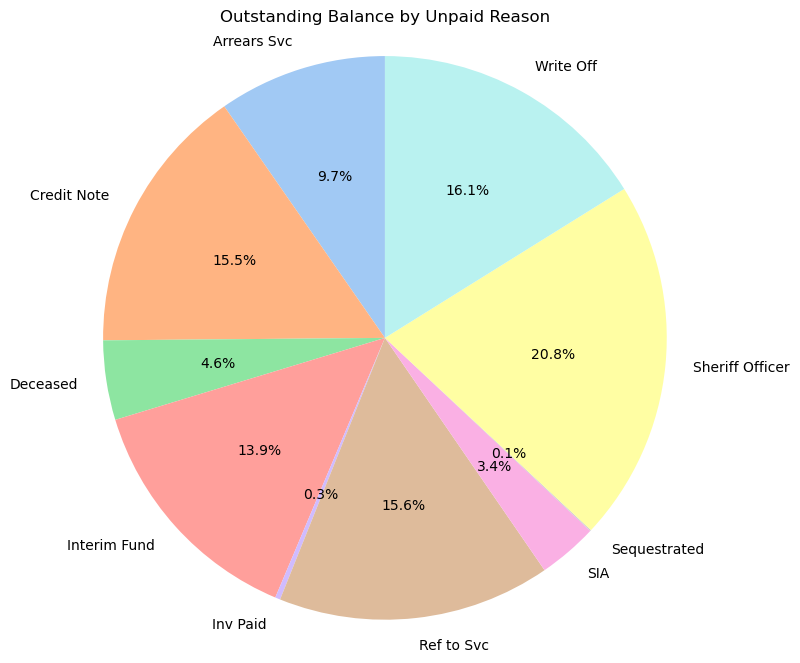

Pie Chart Values (Unpaid Reason vs Sum of Outstanding Balance):
 Unpaid Reason
Arrears Svc        182160.94
Credit Note        292055.36
Deceased            85980.50
Interim Fund       263029.12
Inv Paid             5507.50
Ref to Svc         295211.35
SIA                 64311.33
Sequestrated         1140.21
Sheriff Officer    392581.80
Write Off          304423.94
Name: Outstanding Balance, dtype: float64
Summary of Pie Chart:
 count        10.000000
mean     188640.205000
std      140363.164762
min        1140.210000
25%       69728.622500
50%      222595.030000
75%      294422.352500
max      392581.800000
Name: Outstanding Balance, dtype: float64


In [4]:
# Group data by Unpaid Reason and sum the Outstanding Balance
unpaid_reason_data = data.groupby('Unpaid Reason')['Outstanding Balance'].sum()

# Pie plot
plt.figure(figsize=(8, 8))
plt.pie(unpaid_reason_data, labels=unpaid_reason_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Outstanding Balance by Unpaid Reason')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Print the values and summary
print("Pie Chart Values (Unpaid Reason vs Sum of Outstanding Balance):\n", unpaid_reason_data)
print("Summary of Pie Chart:\n", unpaid_reason_data.describe())


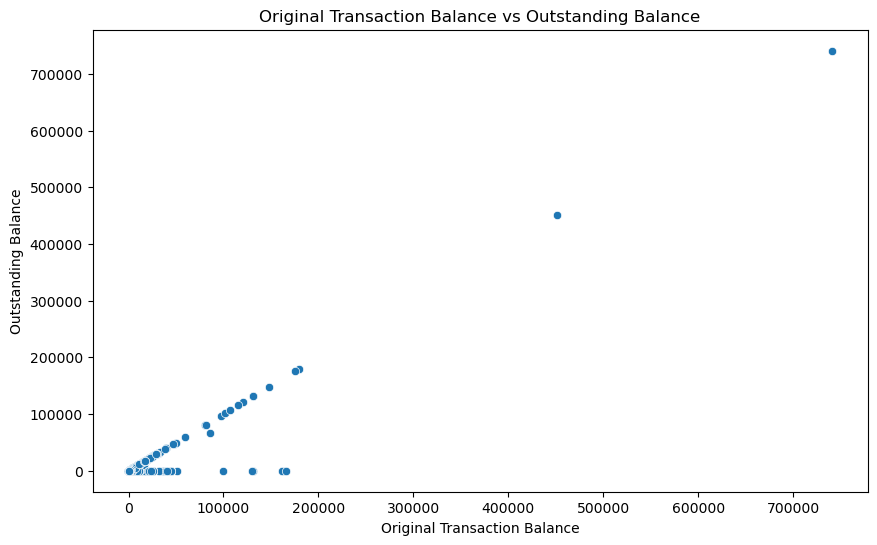

Scatter Plot Values (Original Transaction Balance vs Outstanding Balance):
      Original Transaction Balance  Outstanding Balance
0                            76.00                76.00
1                            69.00                 0.00
2                          7396.32                 0.00
3                          6985.92                 0.00
4                          6985.92              6985.92
...                            ...                  ...
4395                         98.49                98.49
4396                         55.90                55.90
4397                         55.90                55.90
4398                         55.90                55.90
4399                         52.60                52.60

[4400 rows x 2 columns]
Summary of Scatter Plot:
        Original Transaction Balance  Outstanding Balance
count                   4400.000000          4400.000000
mean                    1863.730584          1220.196564
std                    16029.70

In [5]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Original Transaction Balance'], y=data['Outstanding Balance'])
plt.title('Original Transaction Balance vs Outstanding Balance')
plt.xlabel('Original Transaction Balance')
plt.ylabel('Outstanding Balance')
plt.show()

# Print the values and summary
print("Scatter Plot Values (Original Transaction Balance vs Outstanding Balance):")
print(data[['Original Transaction Balance', 'Outstanding Balance']].dropna())
print("Summary of Scatter Plot:\n", data[['Original Transaction Balance', 'Outstanding Balance']].describe())


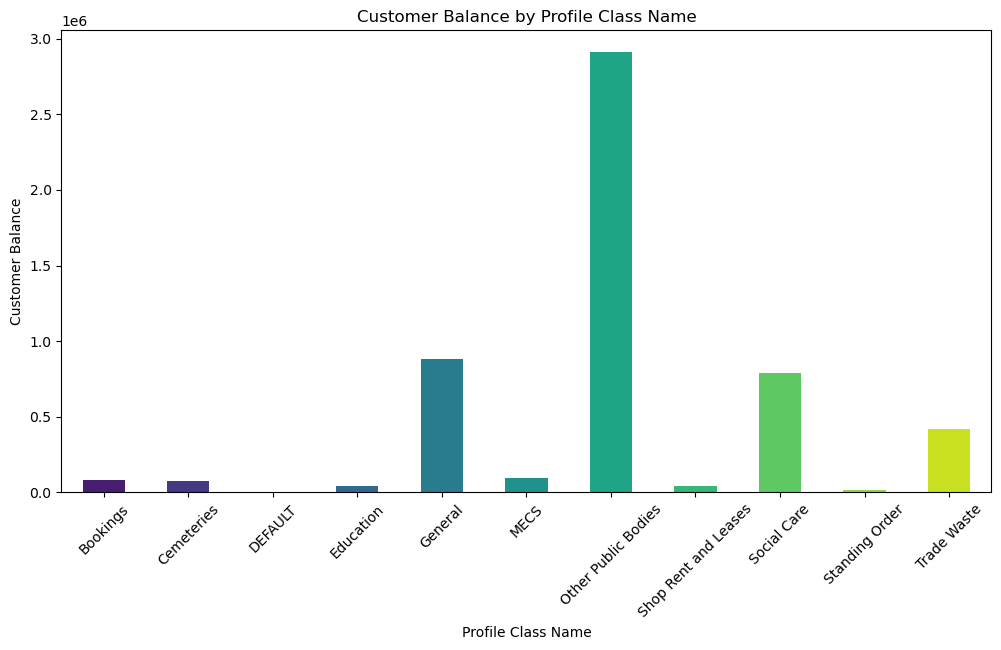

Clustered Bar Chart Values (Profile Class Name vs Sum of Customer Balance):
 Profile Class Name
Bookings                  80770.60
Cemeteries                72046.94
DEFAULT                      80.99
Education                 42071.47
General                  880224.24
MECS                      93290.14
Other Public Bodies     2910575.94
Shop Rent and Leases      38697.67
Social Care              789928.40
Standing Order            14031.47
Trade Waste              421905.79
Name: Customer Balance, dtype: float64
Summary of Clustered Bar Chart:
 count    1.100000e+01
mean     4.857840e+05
std      8.646545e+05
min      8.099000e+01
25%      4.038457e+04
50%      8.077060e+04
75%      6.059171e+05
max      2.910576e+06
Name: Customer Balance, dtype: float64


In [6]:
# Group data by Profile Class Name and sum the Customer Balance
profile_class_data = data.groupby('Profile Class Name')['Customer Balance'].sum()

# Clustered bar chart
plt.figure(figsize=(12, 6))
profile_class_data.plot(kind='bar', color=sns.color_palette('viridis', len(profile_class_data)))
plt.title('Customer Balance by Profile Class Name')
plt.xlabel('Profile Class Name')
plt.ylabel('Customer Balance')
plt.xticks(rotation=45)
plt.show()

# Print the values and summary
print("Clustered Bar Chart Values (Profile Class Name vs Sum of Customer Balance):\n", profile_class_data)
print("Summary of Clustered Bar Chart:\n", profile_class_data.describe())


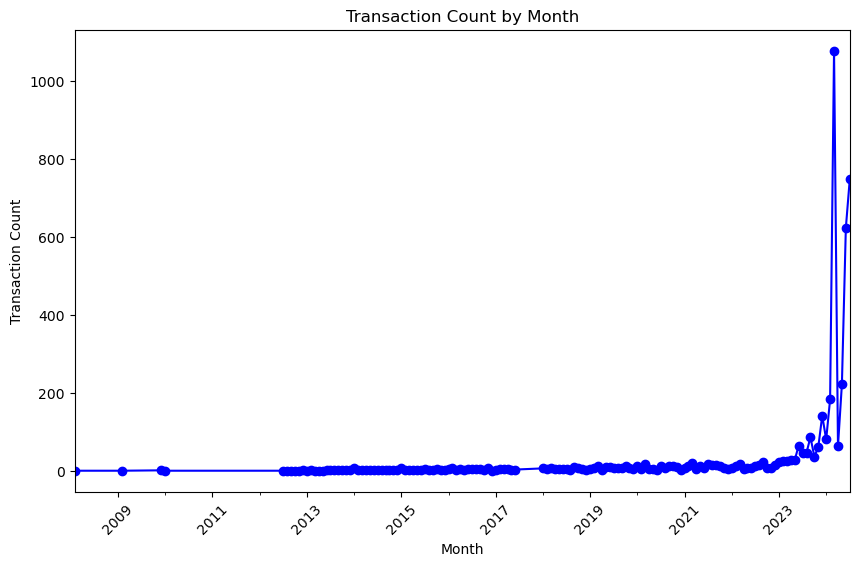

Line Chart Values (Transaction Date Month vs Count of Transactions):
 Transaction Date Month
2008-02       1
2009-02       1
2009-12       2
2010-01       1
2012-07       1
           ... 
2024-03    1077
2024-04      64
2024-05     223
2024-06     623
2024-07     748
Freq: M, Name: Transaction Number, Length: 143, dtype: int64
Summary of Line Chart:
 count     143.000000
mean       30.769231
std       122.157984
min         1.000000
25%         3.000000
50%         5.000000
75%        12.000000
max      1077.000000
Name: Transaction Number, dtype: float64


In [7]:
# Convert Transaction Date to month format
data['Transaction Date Month'] = pd.to_datetime(data['Transaction Date']).dt.to_period('M')

# Group by month and count the number of transactions
monthly_transaction_data = data.groupby('Transaction Date Month')['Transaction Number'].count()

# Line chart
plt.figure(figsize=(10, 6))
monthly_transaction_data.plot(kind='line', marker='o', color='b')
plt.title('Transaction Count by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

# Print the values and summary
print("Line Chart Values (Transaction Date Month vs Count of Transactions):\n", monthly_transaction_data)
print("Summary of Line Chart:\n", monthly_transaction_data.describe())


In [8]:
# Calculate totals and counts
total_customer_balance = data['Customer Balance'].sum()
total_outstanding_balance = data['Outstanding Balance'].sum()
transaction_count = data['Transaction Number'].count()

# Print the card values
print(f"Total Customer Balance: {total_customer_balance:.2f}")
print(f"Total Outstanding Balance: {total_outstanding_balance:.2f}")
print(f"Total Number of Transactions: {transaction_count}")


Total Customer Balance: 5343623.65
Total Outstanding Balance: 5368864.88
Total Number of Transactions: 4400
